In [1]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split


In [5]:
df=pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


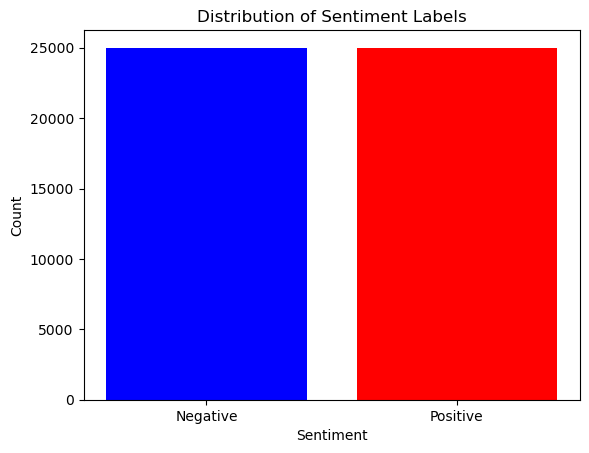

In [6]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment label
sentiment_counts = df['sentiment'].value_counts()

# Plot the distribution of sentiment labels
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['blue', 'red'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


In [7]:
max_features = 10000
maxlen = 200
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=maxlen)
y = df['sentiment']

In [8]:
y = pd.get_dummies(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=2, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))



Epoch 1/5


1250/1250 [==============================] - 170s 135ms/step - loss: 0.3935 - accuracy: 0.8262 - val_loss: 0.2936 - val_accuracy: 0.8776
Epoch 2/5
1250/1250 [==============================] - 177s 142ms/step - loss: 0.2501 - accuracy: 0.9025 - val_loss: 0.2871 - val_accuracy: 0.8896
Epoch 3/5
1250/1250 [==============================] - 176s 141ms/step - loss: 0.1950 - accuracy: 0.9262 - val_loss: 0.2951 - val_accuracy: 0.8930
Epoch 4/5
1250/1250 [==============================] - 174s 139ms/step - loss: 0.1631 - accuracy: 0.9375 - val_loss: 0.2902 - val_accuracy: 0.8855
Epoch 5/5
1250/1250 [==============================] - 174s 139ms/step - loss: 0.1311 - accuracy: 0.9531 - val_loss: 0.3308 - val_accuracy: 0.8841


In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 9s 28ms/step - loss: 0.3308 - accuracy: 0.8841
Test Loss: 0.3308313190937042
Test Accuracy: 0.8841000199317932


In [ ]:
# Assuming `new_data` is a list containing new reviews
new_data = [
    "This movie was awesome. I loved each shoot of movie!",
    "Horrific movie. I regret wasting my money on it."
]

# Tokenize and pad sequences for new data
new_sequences = tokenizer.texts_to_sequences(new_data)
new_sequences = pad_sequences(new_sequences, maxlen=maxlen)

# Use the trained model to predict sentiment
predictions = model.predict(new_sequences)

# Decode predictions
labels = ['Negative', 'Positive']
for i, prediction in enumerate(predictions):
    label = labels[prediction.argmax()]
    print(f"Review: {new_data[i]}")
    print(f"Predicted sentiment: {label}")
    print()


1/1 [==============================] - 0s 339ms/step
Review: This movie was fantastic. I loved every moment of it!
Predicted sentiment: Positive

Review: Terrible movie. I regret wasting my time watching it.
Predicted sentiment: Negative



In [17]:
# Take input from the user
user_input = input("Enter a movie review: ")

# Tokenize and pad sequence for the user input
input_sequence = tokenizer.texts_to_sequences([user_input])
input_sequence = pad_sequences(input_sequence, maxlen=maxlen)

# Use the trained model to predict sentiment
prediction = model.predict(input_sequence)

# Decode the prediction
label = labels[prediction.argmax()]

# Print the predicted sentiment
print("Predicted sentiment:", label)


Enter a movie review: could have been better
1/1 [==============================] - 0s 44ms/step
Predicted sentiment: Negative
